In [61]:
import numpy as np
import find_alpha
import matplotlib.pyplot as plt

In [62]:
f_0 = 300
mu = 8e5
a = 0
b = 1e-2
N = 100
t_ax = np.linspace(a,b,N)

x_t = lambda t : np.cos(2 * np.pi * f_0 * t + mu * t**2)

beta_0 = 3e3
A = 0.5
dt = 2e-3

kernel = lambda t, beta : np.exp(- beta * t) + A * np.exp(- beta * t - dt)

kernel_0 = kernel(t_ax, beta_0)
kernel_5 = kernel(t_ax, beta_0 * 1.05)
kernel_10 = kernel(t_ax, beta_0 * 0.9)

In [63]:
def conv(kernel, func):
    result = np.zeros(len(func))
    F = np.flip(func, 0)
    for i in range(len(func)):
        result[i] = np.sum(kernel * np.roll(F, i + 1))
    return result

In [64]:
right_part = find_alpha.conv(kernel_0, x_t(t_ax))
kernel_fft = np.fft.fft(kernel_5)
m_omega = lambda omega: omega ** 2 + 1e-4
freq_ax = np.fft.fftfreq(len(t_ax), t_ax[1] - t_ax[0])
m_ar = m_omega(freq_ax)

In [65]:
#методом приращений
sigma = 1e-1
N = 1000
epoch = 1000
alpha_range = np.linspace(1e-14, 1e-13, N)
alpha_opt = np.zeros(epoch)
for i in range(epoch):
    sol_ar = np.zeros((N, len(t_ax)))
    noise = np.random.normal(0, sigma)
    right_noisy = right_part + noise
    right_fft = np.fft.fft(right_noisy)
    for j in range(N):
        sol_ar[j] = find_alpha.fourier_solve(kernel_fft, right_fft, m_ar, alpha_range[j])
    sol_ar = np.diff(sol_ar, axis=0)
    sol_ar = np.linalg.norm(sol_ar, axis=1)
    alpha_opt[i] = alpha_range[np.argmin(sol_ar)]

(array([  3.,   5.,   9.,   4.,  22.,  40.,  60., 185., 411., 261.]),
 array([7.57657658e-14, 7.81801802e-14, 8.05945946e-14, 8.30090090e-14,
        8.54234234e-14, 8.78378378e-14, 9.02522523e-14, 9.26666667e-14,
        9.50810811e-14, 9.74954955e-14, 9.99099099e-14]),
 <BarContainer object of 10 artists>)

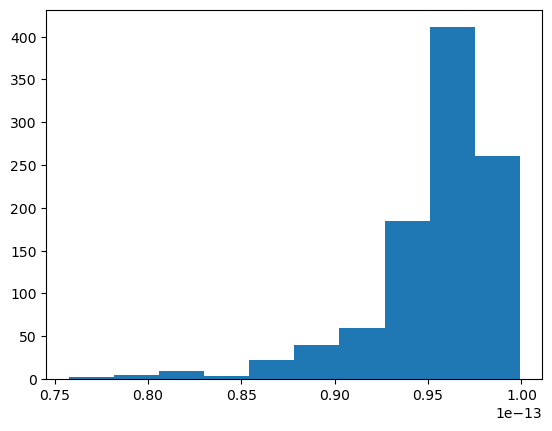

In [66]:
plt.hist(alpha_opt)